In [7]:
# MY KEY 
import os
import sys
import json
import random
import pandas as pd
import requests
from pathlib import Path
import pickle
from matplotlib import pyplot as plt
from typing import List

from bdp.data.crypto.coingecko.downloads import (
    get_all_coins_and_contracts_data,
    get_all_coins_and_markets,
    get_coins_to_download,
    get_one_coin_metadata
)


from bdp.data.crypto.coingecko.coingecko_dataclasses import (
    AllCoinsMetadata,
    CoinMetadata
)

from bdp.data.crypto.coingecko.timeseries_preprocessing import (
    timeseries_and_metadata
)

In [8]:
coingecko_key = "CG-rkg4RTUcfEWYAQ4xUejxPpkS"
date_string="2024-03-19"

selected_coins = get_coins_to_download(date_string=date_string,key=coingecko_key,number_of_coins_to_download=1500,percentage_on_top = .1,number_of_pages=4,redo=False)
all_coins_metadata = AllCoinsMetadata(date_string=date_string,coingecko_key=coingecko_key)
some_coins_to_download = selected_coins[:1500]
#all_coins_metadata.download_coins_metadata(coins_to_download=some_coins_to_download)
all_coins_metadata.download_df_timeseries()

100%|██████████| 2056/2056 [00:10<00:00, 199.16it/s]

Obtained 2056 timeserieses Missing 0


In [9]:
all_coins_timeseries = timeseries_and_metadata(all_coins_metadata) # dict of all timeseries metadata with ts


100%|██████████| 2056/2056 [00:17<00:00, 114.34it/s]


In [30]:
import numpy as np
coin_id = 'leo-token'
df = all_coins_metadata.df_time_series[coin_id]
max_values = df.max()
max_indices = df.idxmax()

# 2. Normalize the DataFrame by dividing by the maximum value of each column
df = df / max_values
df.columns

Index(['prices', 'market_caps', 'total_volumes'], dtype='object')

In [27]:
max_values["prices"]

6.194739271953207

In [35]:
len(df["prices"])

2160

<Axes: >

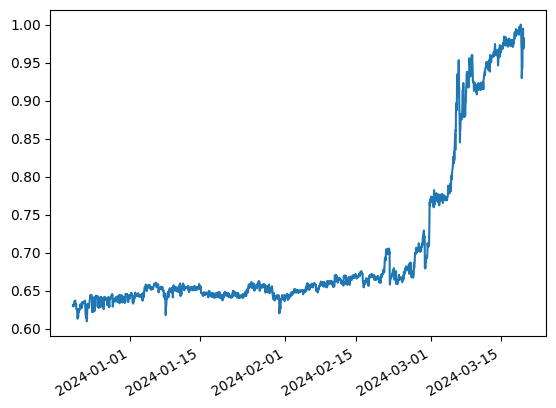

In [28]:
df['prices'].plot()

<Axes: >

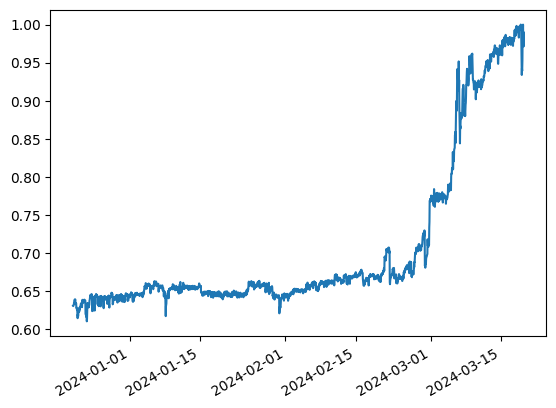

In [29]:
df['market_caps'].plot()